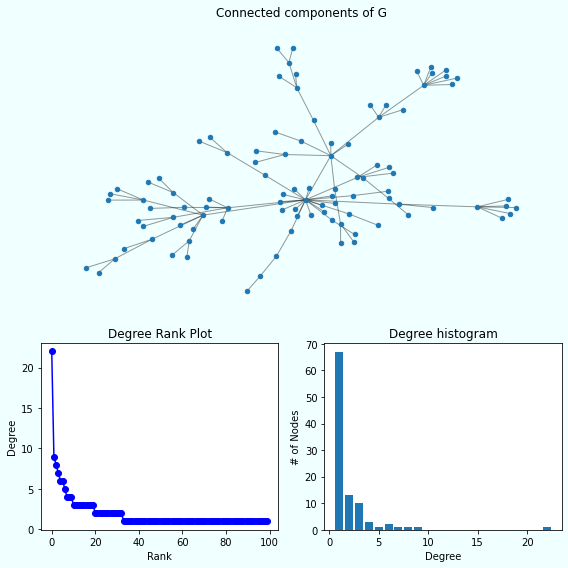

In [13]:
from ba import BAModel
bamodel=BAModel(2)
bamodel.ba_run(1,100)
bamodel.draw()

not converged


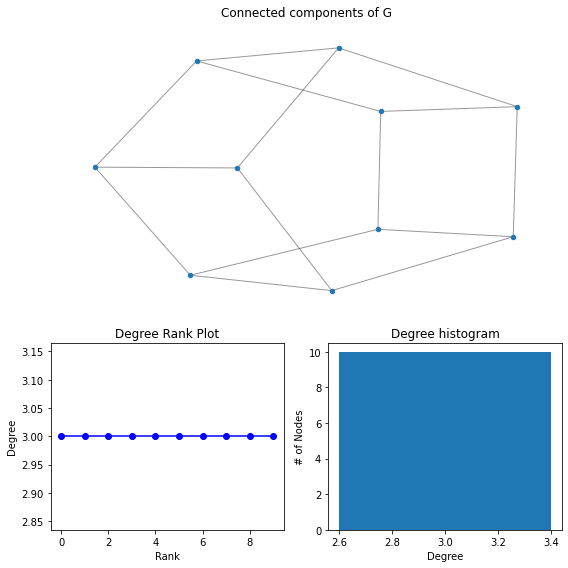

In [3]:
from grover import Grover
from qba import QBA
import plot
import write
from networkx import DiGraph
PATH=[(0,0.),(1,1.)]
MAX=1
N=5
# G=Grover([])
# G.complete_graph(N)
# G.grover(MAX,PATH)
# G.arc_plot()
# G=Grover([])
# G.complete_graph(N)
# G.matrix_grover(MAX,PATH)
# G.arc_plot()
qba=QBA().build_circular_ladder_graph(N,PATH)
qba.grover(MAX)
plot.deg_plot(DiGraph(qba.arcs))
#write.write_for_csv(qba,PATH)

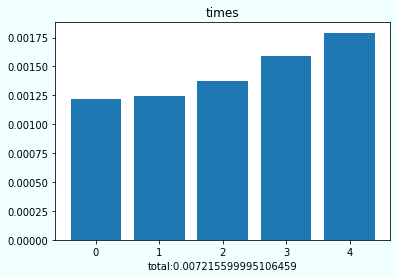

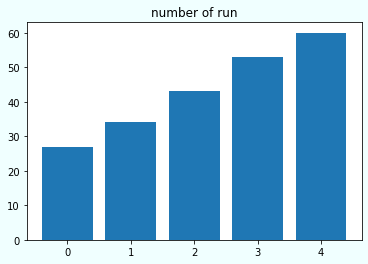

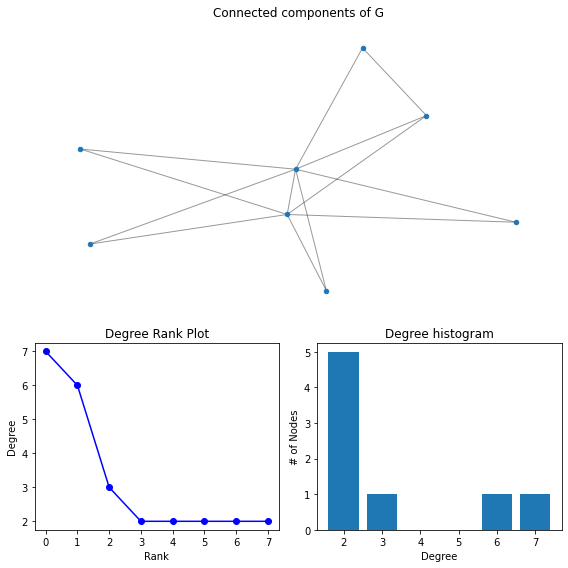

In [1]:
# import matplotlib.pyplot as plt
# import numpy as np
# import time
# import plot
# from grover import Grover
# PATH=[(0,1.),(1,-1.)]
# G=Grover([])
# G.complete_graph(3)
# times=[]
# for _ in range(5):
#     time_sta = time.perf_counter()
#     # G.grover(100000,PATH)
#     G.matrix_grover(100000,PATH)
#     G.qba_run(2,PATH)
#     time_end = time.perf_counter()
#     times.append(time_end-time_sta)
# plot.plot_time(times)
# G.make_count_histgram()
# G.deg_plot()

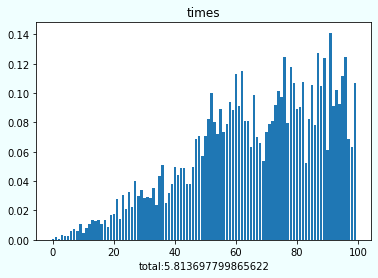

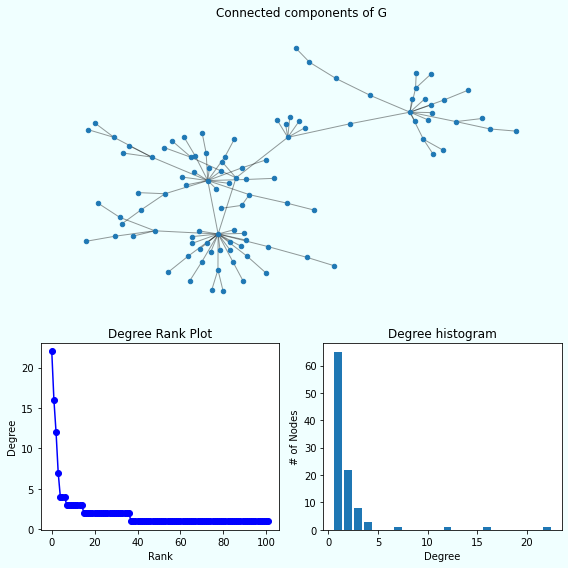

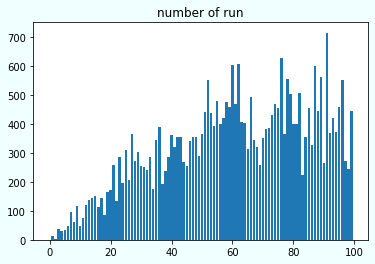

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import plot
from qba import QBA
PATH=[(0,0.7),(1,-0.2)]
# qba=QBA().build_comp_graph(3,PATH)
qba=QBA().build_path_graph(2,PATH)
qba.run_qba(100,5000)

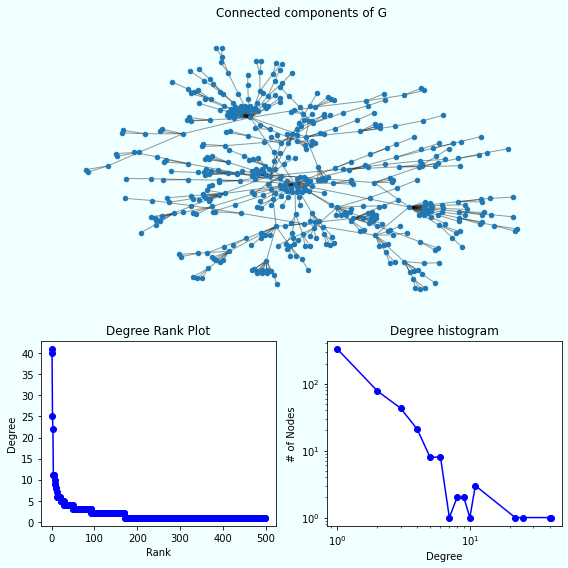

In [5]:
from ba import BAModel
bamodel=BAModel(2)
bamodel.ba_run(1,500)
bamodel.draw()

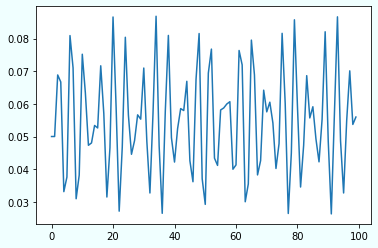

In [5]:
from qba import QBA
import numpy as np

## 線を刺す
PATH=[]
num_of_v=20
add_v=0
prob_vertex=[0]
num_pin=1
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
# print(qba.deg)
#qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v)])
# qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v),(add_v,num_of_v+1),(num_of_v+1,add_v)])
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
qba.non_flow_grover(100,prob_vertex)
qba.plot_origin_prob()

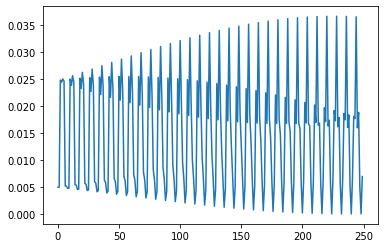

In [66]:
from qba import QBA
import numpy as np

# 辺を取って外につける
PATH=[]
num_of_v=100
add_v=0
prob_vertex=[0]
num_pin=50
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
# qba.deg=np.append(qba.deg,1)
# qba.deg=np.append(qba.deg,1)
# qba.deg[add_v]+=num_pin
# print(qba.deg)
#qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v)])
# qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v),(add_v,num_of_v+1),(num_of_v+1,add_v)])
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
# print(qba.arcs)
for a in range(num_pin):
    qba.arcs.remove((add_v,add_v+a+1))
    qba.arcs.remove((add_v+a+1,add_v))
    qba.deg[add_v+a+1]-=1
#print(qba.deg)

qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
qba.non_flow_grover(250,prob_vertex)
qba.plot_origin_prob()


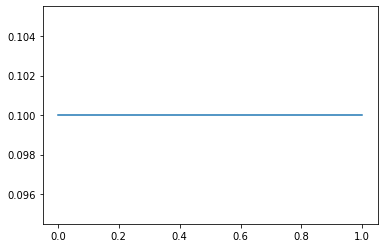

In [4]:
from qba import QBA
import numpy as np

##長いピンを一本刺す 途中
PATH=[]
num_of_v=4
add_v=0
prob_vertex=[0]
num_pin=1
num_pin_len=3
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin-1):
    qba.deg=np.append(qba.deg,2)
qba.deg[add_v]+=num_pin
# print(qba.deg)
#qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v)])
# qba.arcs.extend([(add_v,num_of_v),(num_of_v,add_v),(add_v,num_of_v+1),(num_of_v+1,add_v)])
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
qba.non_flow_grover(2,prob_vertex)
qba.plot_origin_prob()

In [ ]:
from qba import QBA
import numpy as np

PATH=[]
num_of_v_n=3
num_of_v_m=5
add_v=0
prob_vertex=[a for a in range(num_of_v_n)]
# prob_vertex=[a for a in range(num_of_v_n, num_of_v_m+num_of_v_n)]
# prob_vertex=[0]
print(prob_vertex)
qba=QBA().build_comp_biber_graph(num_of_v_n,num_of_v_m,PATH)
qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=1
qba.arcs.extend([(add_v,num_of_v_n+num_of_v_m),(num_of_v_n+num_of_v_m, add_v)])
qba.weights = np.zeros(len(qba.arcs))
for i in range(len(qba.arcs)-2):
    qba.weights[i]=1.
# qba.arc_plot()
qba.non_flow_grover(250,prob_vertex)
qba.plot_origin_prob()

In [1]:
from qba import QBA
import numpy as np

## 刺した場所の重みを反転させる
PATH=[]
num_of_v=150
add_v=0
prob_vertex=[0]
num_pin=1
qba=QBA().build_comp_graph(num_of_v,PATH)
for _ in range(num_pin):
    qba.deg=np.append(qba.deg,1)
qba.deg[add_v]+=num_pin
# print(qba.deg)
qba.arcs.extend([(add_v, num_of_v+a) for a in range(num_pin)])
qba.arcs.extend([(num_of_v+a,add_v) for a in range(num_pin)])
qba.weights = np.zeros(len(qba.arcs))
# print(qba.arcs)
# print(qba.grover_inv(num_pin))
# qba.arc_plot()
for i in range(len(qba.arcs)-num_pin*2):
    qba.weights[i]=1.
# qba.arc_plot()
qba.non_flow_grover(300,prob_vertex,num_pin)
qba.plot_origin_prob()

KeyboardInterrupt: 

[(0, 1), (0, 2), (1, 2), (1, 0), (2, 3), (2, 0), (2, 1), (3, 4), (3, 5), (3, 2), (4, 5), (4, 3), (5, 3), (5, 4)]


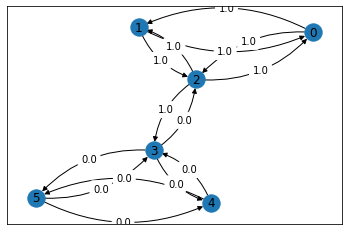

In [7]:
from qba import QBA
import numpy as np

## 完全グラフ二つくっつける
PATH=[]
num_of_v=3
prob_vertex=[0]
qba=QBA().build_comp_add_graph(num_of_v,num_of_v,PATH)
qba.weights = np.zeros(len(qba.arcs))
# qba.arc_plot()
print(qba.arcs)
for i in range(int (len(qba.arcs)/2)):
    if qba.arcs[i]!=(num_of_v-1,num_of_v) or qba.arcs[i]!=(num_of_v,num_of_v-1):
    qba.weights[i]=1.
qba.arc_plot()
# qba.non_flow_grover(100,prob_vertex)
# qba.plot_origin_prob()